In [29]:
import pandas as pd 
import numpy as np
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt

In [30]:
#laod all the dataset 
Node = pd.read_csv('Node_info.csv')
Edge = pd.read_csv('Edge_info.csv')
dat2 = pd.read_csv('Song_attribute.csv')
artist = pd.read_csv("cleaned_artist.csv")
artist.head()

,artist,related_to,genres,id,related_id,popularity,followers,collaborations,genres_num
0,J. Cole,Drake,['conscious hip hop' 'hip hop' 'north carolina...,6l3HvQ5sa6mXTsMTB19rO5,3TVXtAsR1Inumwj472S9r4,84.0,17438272.0,2.0,4.0
1,Meek Mill,Drake,['hip hop' 'philly rap' 'pop rap' 'rap' 'south...,20sxb77xiYeusSH8cVdatc,3TVXtAsR1Inumwj472S9r4,75.0,6359883.0,0.0,6.0
2,DJ Khaled,Drake,['dance pop' 'dirty south rap' 'hip hop' 'miam...,0QHgL1lAIqAw0HtD7YldmP,3TVXtAsR1Inumwj472S9r4,76.0,7974759.0,0.0,9.0
3,Rick Ross,Drake,['dirty south rap' 'gangster rap' 'hip hop' 'p...,1sBkRIssrMs1AbVkOJbc7a,3TVXtAsR1Inumwj472S9r4,76.0,6101612.0,10.0,7.0
4,Wale,Drake,['dance pop' 'gangster rap' 'hip hop' 'pop' 'p...,67nwj3Y5sZQLl72VNUHEYE,3TVXtAsR1Inumwj472S9r4,70.0,3728546.0,0.0,10.0


In [31]:
#extrac the data needed 
Nodes = Node['node'].tolist()
Node_size = Node['node_size'].tolist()
Node_color = Node['node_color'].tolist()

#have the edges:
Edges = []
Edge_weights = []
for index, rows in artist.iterrows():
    #make iterable 
    temp =(rows.artist, rows.related_to)
    #check if both nodes are inside the nodes list 
    if temp[0] in Nodes and temp[1] in Nodes:
      Edges.append(temp)
      Edge_weights.append(rows.collaborations)
        

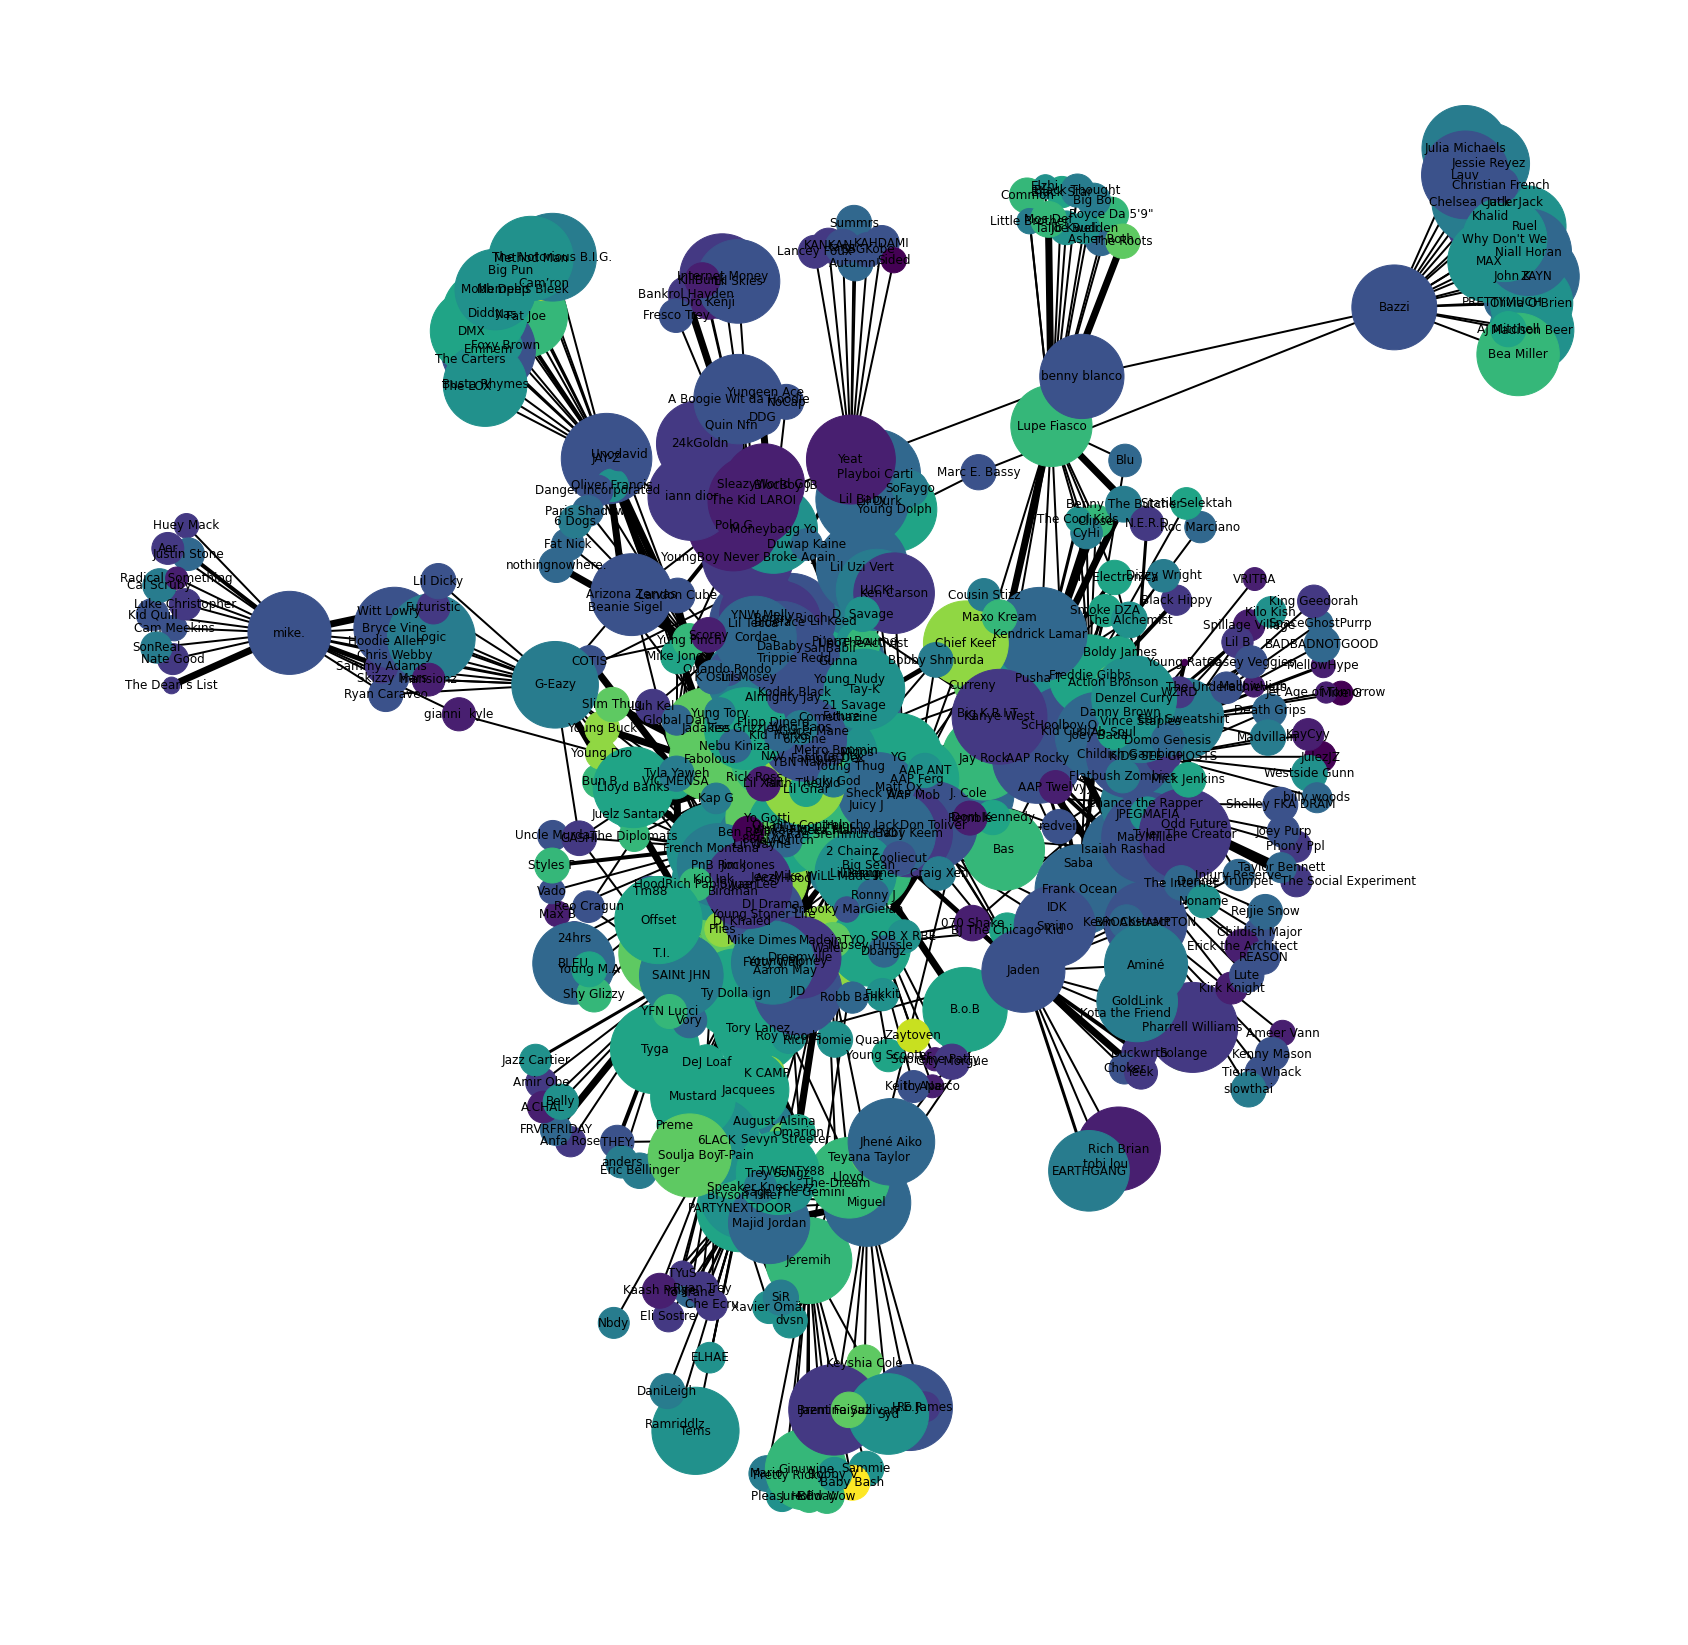

In [32]:
#build up the network 
G = nx.Graph() 

#Prepare node attributesm it make take a whike 
#use dictionary to retreive all artists songs 
Art = {}
keys1 = list(Nodes)
#add sub dictionary for each artist 
for i in keys1:
  Art[i] = {}
#add each artists songs to their dictionaries 
for key in keys1:
  for index, rows in dat2.iterrows():
    if rows.artist == key:
      Art[key][rows.song_name] = rows.song_info





#add node and weight
for i in range(len(Nodes)):
  G.add_node(Nodes[i], weight = Node_size[i], songs = Art[Nodes[i]],diversity = Node_color[i])
#add edge and weight 
G.add_edges_from(Edges)

#make edge weights more mutual 
for i in range(len(Edge_weights)):
  if Edge_weights[i] == 0:
    Edge_weights[i] = 2
  elif Edge_weights[i] == 1:
    Edge_weights[i] = 3
  elif Edge_weights[i] == 2:
    Edge_weights[i] = 4
  elif Edge_weights[i] == 3:
    Edge_weights[i] = 5
  elif Edge_weights[i] > 3:
    Edge_weights[i] = 7

fig, ax = plt.subplots(figsize=(30,30))

nx.draw(G,with_labels=True,node_size = Node_size,node_color =Node_color,width = Edge_weights)